# 1. Introduction
This dataset is showing records of over 18k products that compiled from KeithGalli's GitHub repository on Pandas Data Science Tasks.

You can find and access the repository here - https://github.com/KeithGalli/Pandas-Data-Science-Tasks

This notebook is aimed at exploring, getting an overview of the dataset followed by cleaning & visualizations to answer business problems: 

<b>1.1. What product sold the most?</b>

<b>1.2. What product whose has the sales most?</b>

<b>1.3. What time should we display advertisements to maximize consumer purchasing power?</b>
    
<b>1.4. What was the best month for sales?</b>
    
<b>1.5. What city sold the most product?</b>


# 2. Data Cleaning

In [42]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv(r'C:\Users\Acer\Desktop\PortfolioData\PythonProject\SalesData.csv\SalesData.csv')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
# Checking data types
df.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [5]:
# Checking for missing data
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

No null values in the data

In [8]:
# Checking for duplicate data
df.duplicated().any()

False

No duplicated values in the data

In [10]:
# Drop column 
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


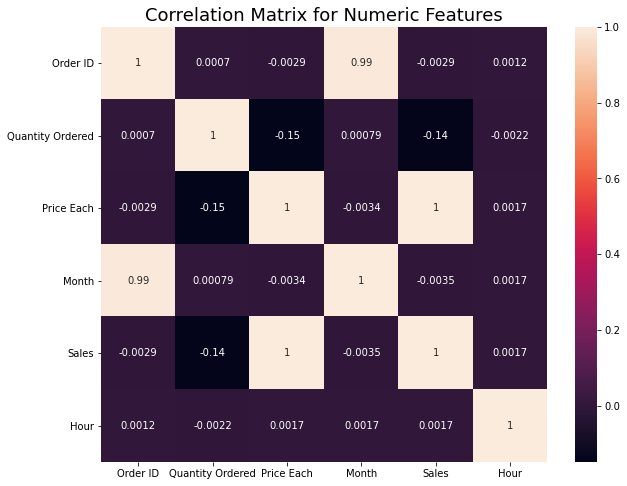

In [15]:
# Shows Correlation Matrix for Numeric Features

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix for Numeric Features',fontsize=18)

plt.show()

# 3. Business Problems

### 3.1. What product sold the most?

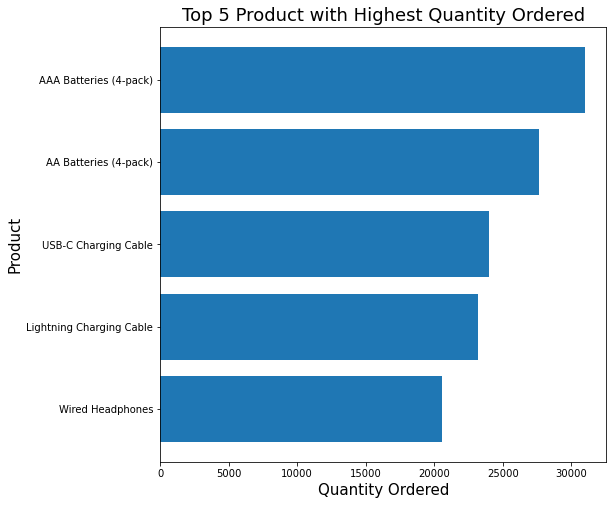

In [64]:
# Identify Top 5 product sold the most

x = df.groupby(['Product'])['Quantity Ordered'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,8))
plt.barh(x.index, x.values)
plt.xlabel('Quantity Ordered',fontsize=15)
plt.ylabel('Product',fontsize=15)
plt.title('Top 5 Product with Highest Quantity Ordered',fontsize=18)
plt.gca().invert_yaxis()

plt.show()

In [16]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

### 3.2. What product whose has the sales most?

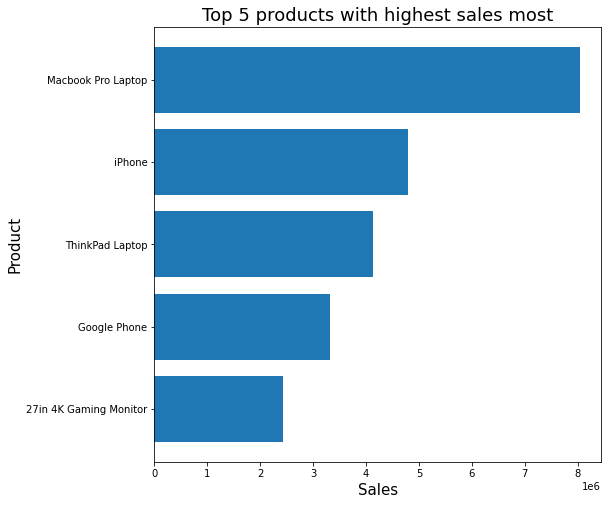

In [63]:
# Identify Top 5 products with highest sales most

y = df.groupby(['Product'])['Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,8))
ay = plt.barh(y.index, y.values)
plt.xlabel('Sales',fontsize=15)
plt.ylabel('Product',fontsize=15)
plt.title('Top 5 products with highest sales most',fontsize=18)
plt.gca().invert_yaxis()

plt.show()

Products with <b>low price</b> were ordered most(Battery, charging cable...). But the highest sales came from products with <b>high price</b> (Macbook, iPhone...)

### 3.3. What time should we display advertisements to maximize consumer purchasing power?

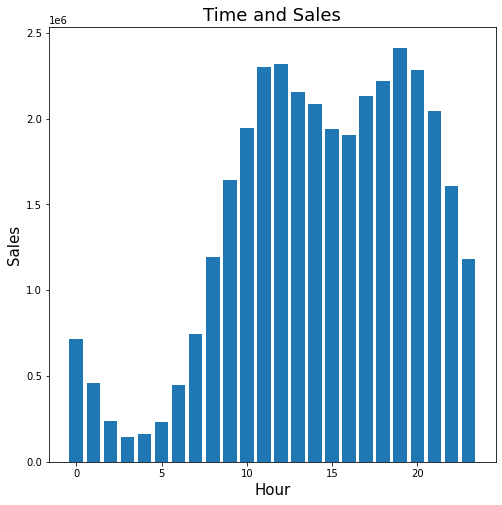

In [57]:
# Shows Sales by time
hour = df.groupby(['Hour'])['Sales'].sum()

plt.figure(figsize=(8,8))
plt.bar(hour.index, hour.values)
plt.xlabel('Hour',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.title('Time and Sales',fontsize=18)

plt.show()

This shows that the sales are high <b>between 9 am to 11 pm</b> and would the appropriate time to play ads.



### 3.4. What was the best month for sales?

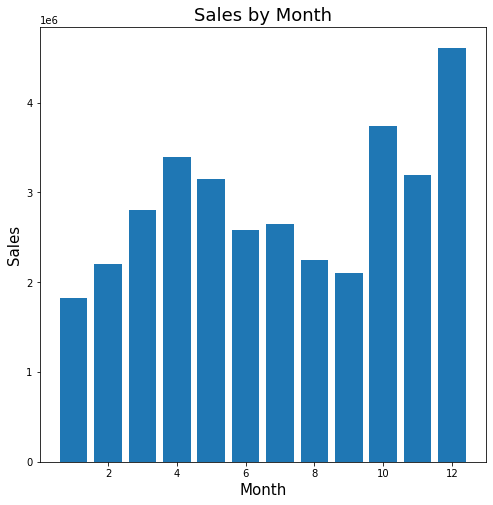

In [62]:
# Shows Sales by months
best_months = df.groupby(['Month'])['Sales'].sum()

plt.figure(figsize=(8,8))
plt.bar(best_months.index, best_months.values)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.title('Sales by Month',fontsize=18)

plt.show()

<b>December</b> with highest sales values. This month is also Christmas and holiday season.

###  3.5. What city sold the most product?

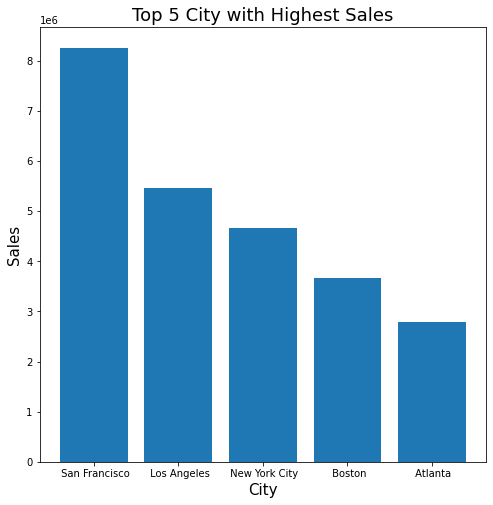

In [68]:
# Shows Top 5 city with Highest Sales
city = df.groupby(['City'])['Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,8))
plt.bar(city.index, city.values)
plt.xlabel('City',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.title('Top 5 City with Highest Sales',fontsize=18)

plt.show()